## Library

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score,f1_score

import warnings
warnings.filterwarnings("ignore")

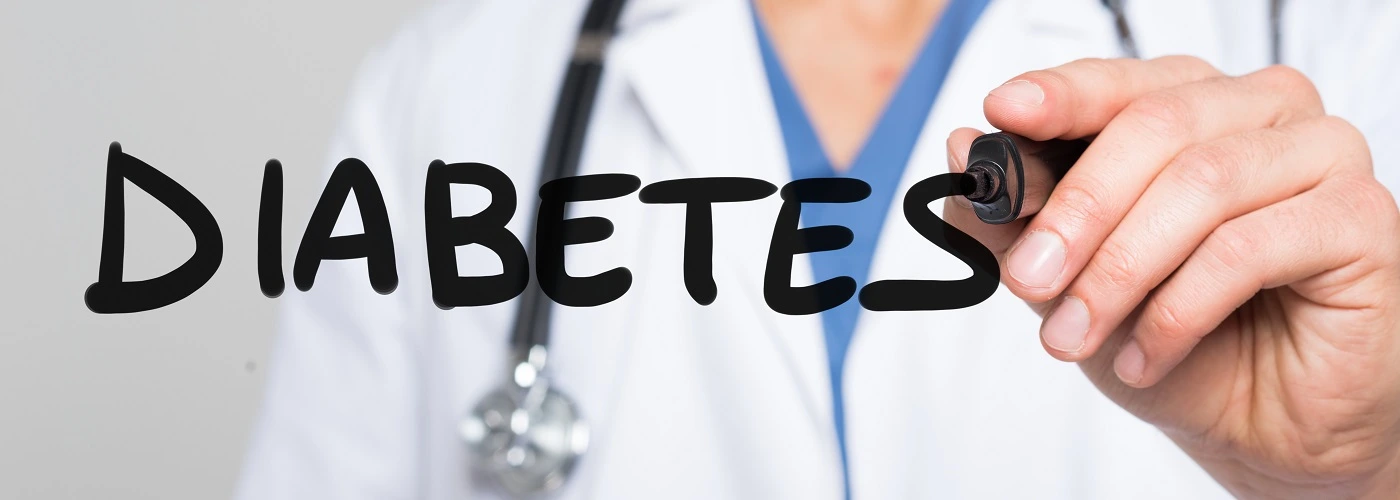

## Read DataSet

In [3]:
diabets_df = pd.read_csv("../DataSet/diabetes_DF.csv",encoding="utf8")
diabets_df = diabets_df.astype(float)
diabets_df.info()
diabets_df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 767 entries, 0 to 766
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               767 non-null    float64
 1   Glucose                   767 non-null    float64
 2   BloodPressure             767 non-null    float64
 3   SkinThickness             767 non-null    float64
 4   Insulin                   767 non-null    float64
 5   BMI                       767 non-null    float64
 6   DiabetesPedigreeFunction  767 non-null    float64
 7   Age                       767 non-null    float64
 8   Outcome                   767 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1.0
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0.0
2,8.0,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1.0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0
4,0.0,137.0,40.0,35.0,168.0,43.1,2.288,33.0,1.0
...,...,...,...,...,...,...,...,...,...
762,9.0,89.0,62.0,0.0,0.0,22.5,0.142,33.0,0.0
763,10.0,101.0,76.0,48.0,180.0,32.9,0.171,63.0,0.0
764,2.0,122.0,70.0,27.0,0.0,36.8,0.340,27.0,0.0
765,5.0,121.0,72.0,23.0,112.0,26.2,0.245,30.0,0.0


In [4]:
diabets_df = diabets_df.drop('Pregnancies',axis=1)
diabets_df.describe()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000,767.000000
mean,120.930900,69.104302,20.522816,79.903520,31.994654,0.472081,33.254237,0.349413
std,31.977581,19.368410,15.958143,115.283105,7.889095,0.331496,11.762079,0.477096
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,99.000000,62.000000,0.000000,0.000000,27.300000,0.243500,24.000000,0.000000
50%,117.000000,72.000000,23.000000,32.000000,32.000000,0.374000,29.000000,0.000000
75%,140.500000,80.000000,32.000000,127.500000,36.600000,0.626500,41.000000,1.000000
max,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Figure size 2000x2000 with 0 Axes>

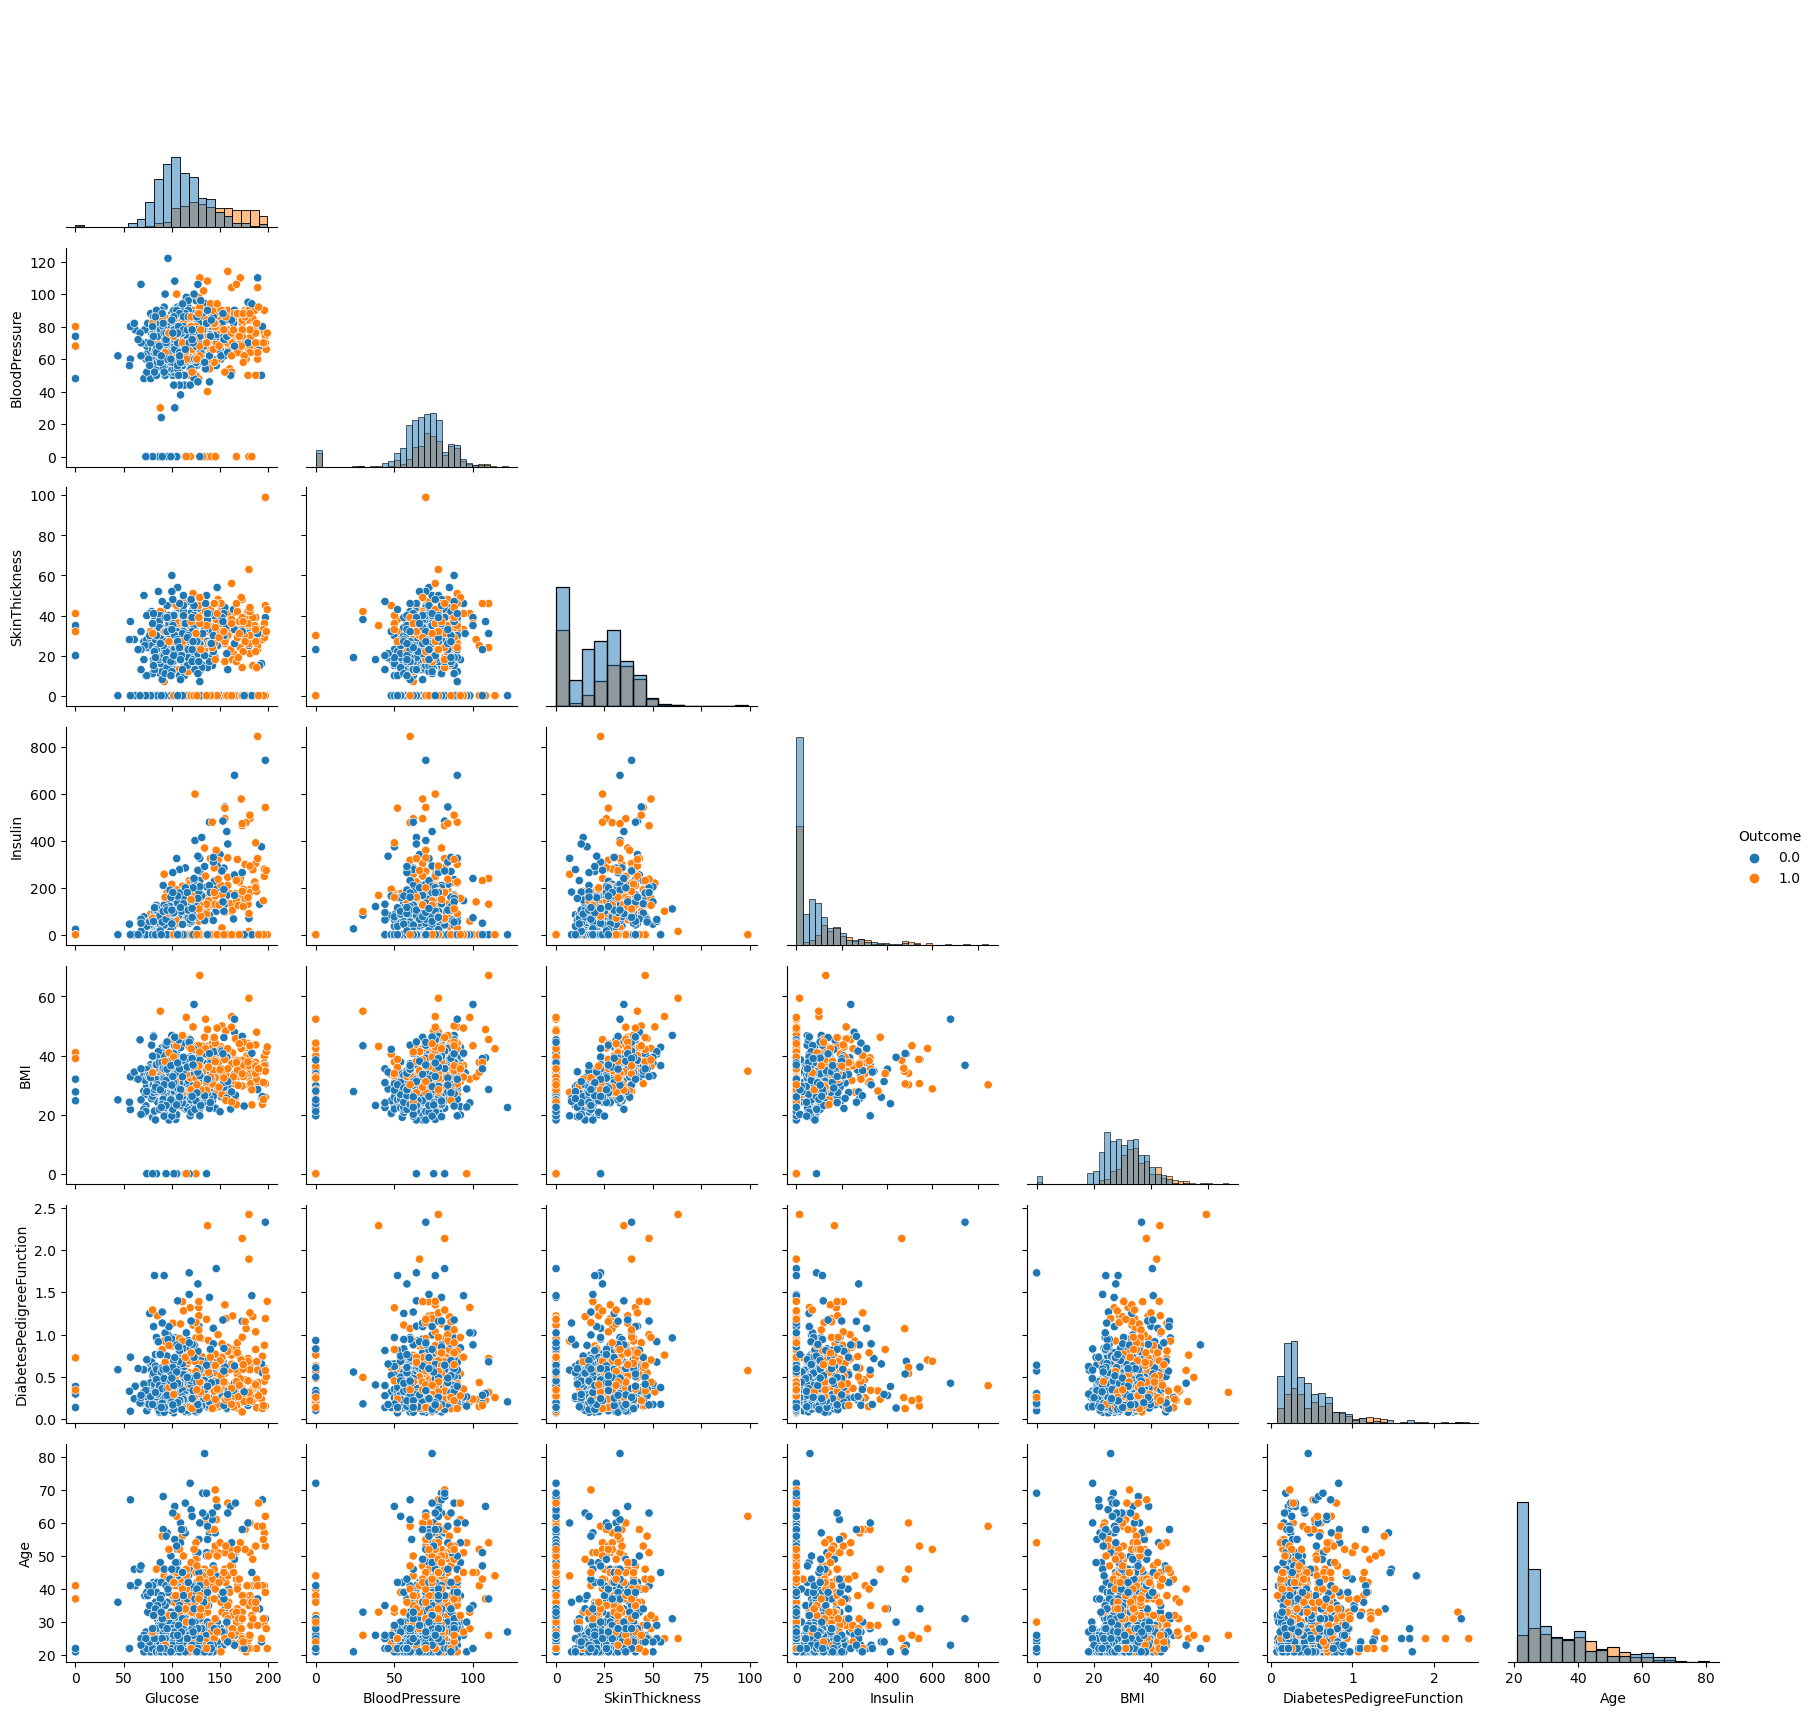

In [5]:
plt.figure(figsize=(20,20))
grid = sns.PairGrid(diabets_df,hue='Outcome',corner=True)
grid.map_diag(sns.histplot)
grid.map_offdiag(sns.scatterplot)
grid.add_legend()

0.0    499
1.0    268
Name: Outcome, dtype: int64

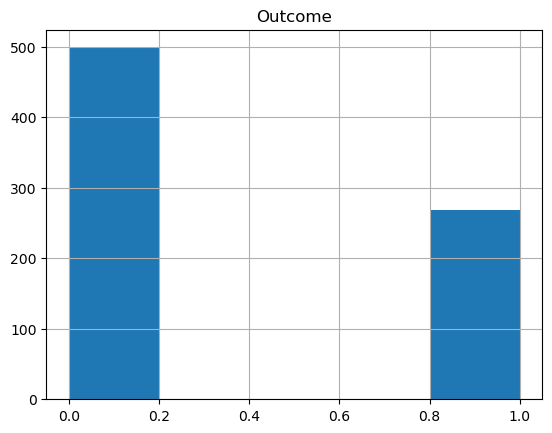

In [7]:
diabets_df.hist(column='Outcome',bins=5)
diabets_df['Outcome'].value_counts()

<AxesSubplot:>

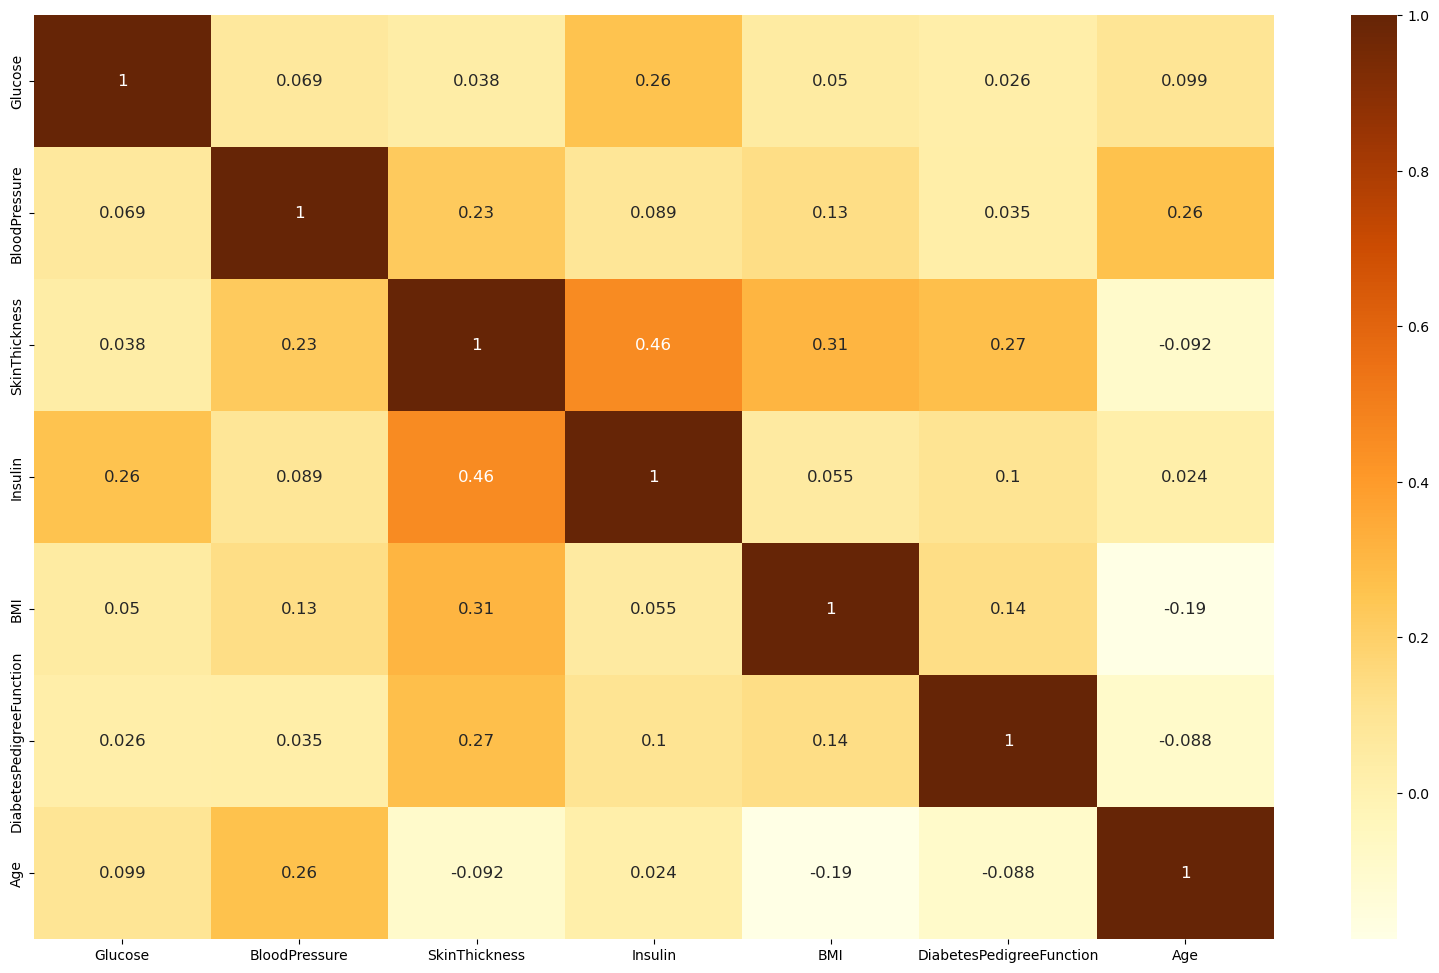

In [6]:
df1 = diabets_df[diabets_df['Outcome'] == 1]
df1 = df1.drop('Outcome',axis=1)
plt.figure(figsize=(20,12))
sns.heatmap(df1.corr(),annot=True,cmap='YlOrBr',annot_kws={'fontsize':12})

<AxesSubplot:>

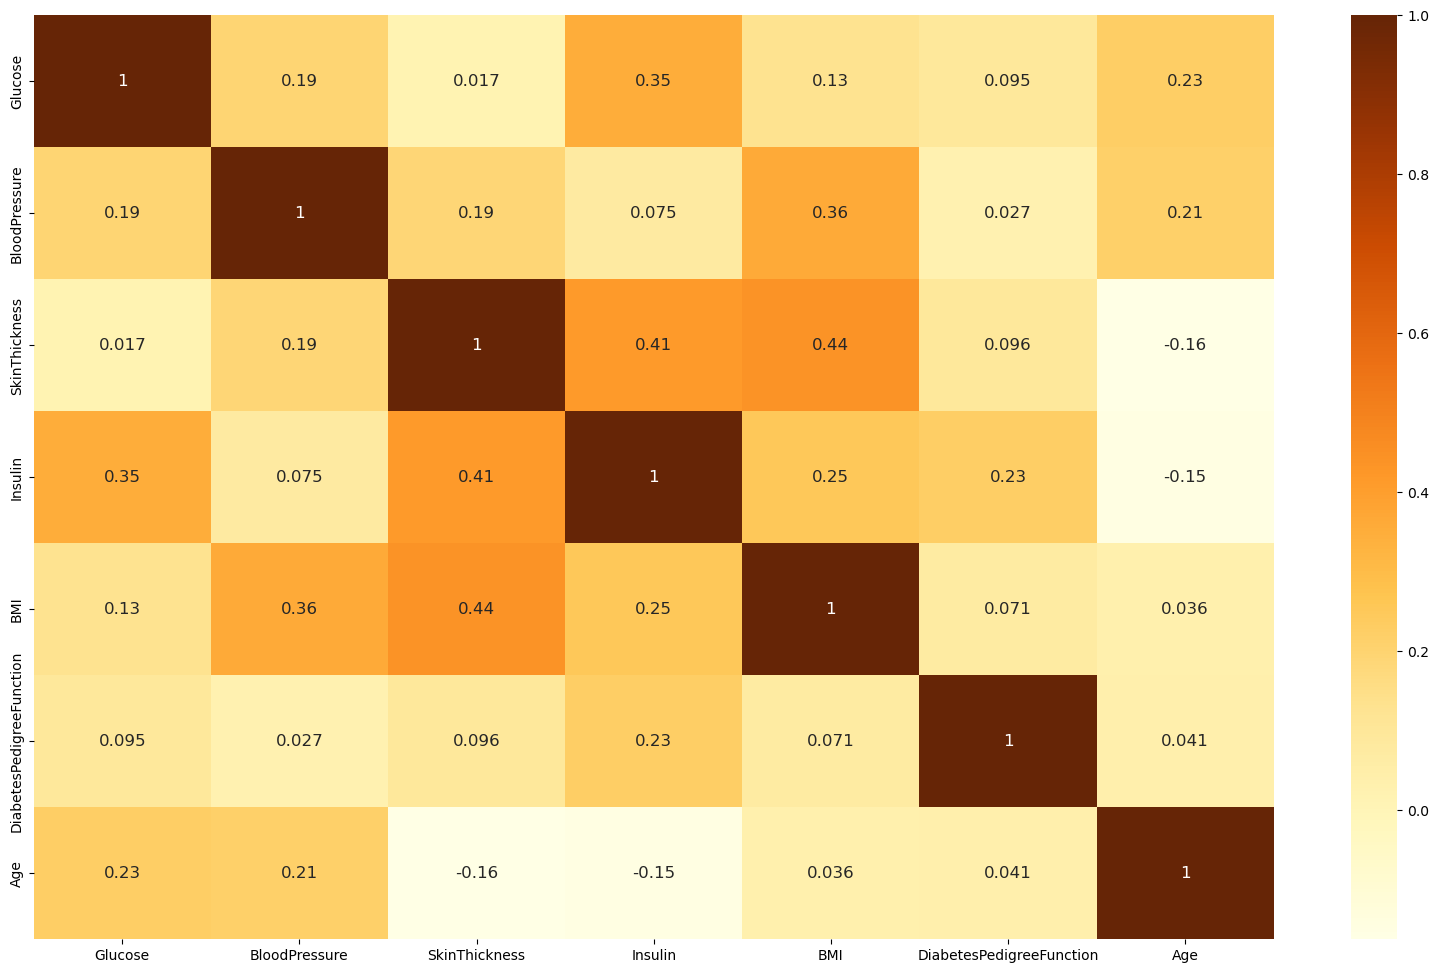

In [7]:
df = diabets_df[diabets_df['Outcome'] != 1]
df = df.drop('Outcome',axis=1)
plt.figure(figsize=(20,12))
sns.heatmap(df.corr(),annot=True,cmap='YlOrBr',annot_kws={'fontsize':12})

268

## Pearson correlation:
$$
r_{xy} = \frac{\sum_{i=1}^{n}(x_i-\bar{x})(y_i-\bar{y})}{\sqrt{\sum_{i=1}^{n}(x_i-\bar{x})^2}\sqrt{\sum_{i=1}^{n}(y_i-\bar{y})^2}}
$$

<AxesSubplot:>

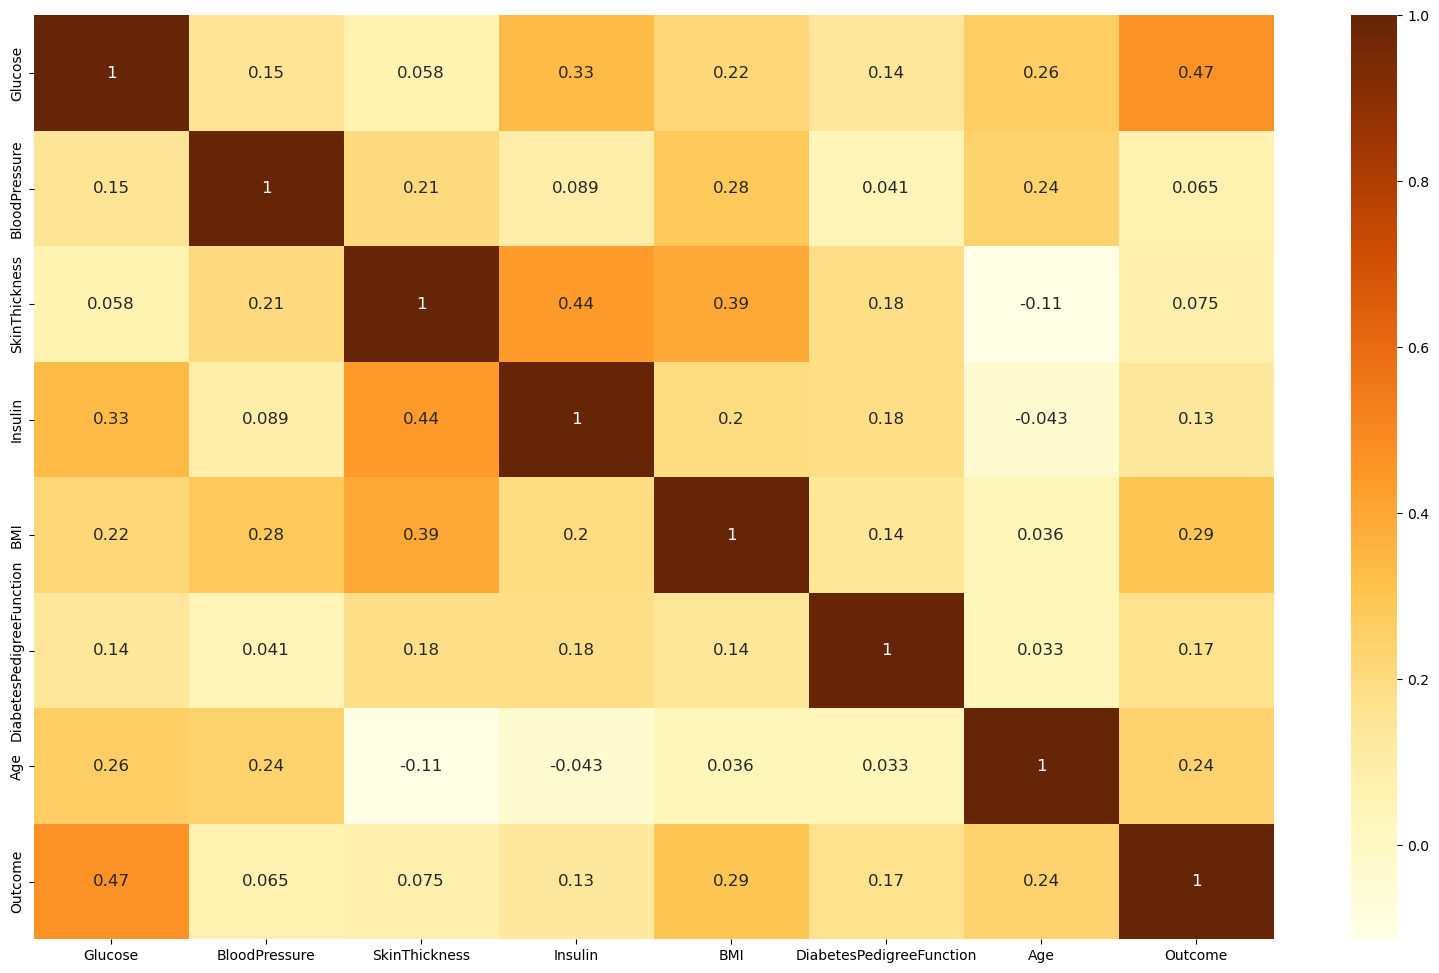

In [11]:
plt.figure(figsize=(20,12))
sns.heatmap(diabets_df.corr(),annot=True,cmap='YlOrBr',annot_kws={'fontsize':12})

In [12]:
diabets_df.columns

Index(['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
X=diabets_df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']].values
display(X[0:5])
y = diabets_df[['Outcome']].values
display(y[0:5])

array([[1.480e+02, 7.200e+01, 3.500e+01, 0.000e+00, 3.360e+01, 6.270e-01,
        5.000e+01],
       [8.500e+01, 6.600e+01, 2.900e+01, 0.000e+00, 2.660e+01, 3.510e-01,
        3.100e+01],
       [1.830e+02, 6.400e+01, 0.000e+00, 0.000e+00, 2.330e+01, 6.720e-01,
        3.200e+01],
       [8.900e+01, 6.600e+01, 2.300e+01, 9.400e+01, 2.810e+01, 1.670e-01,
        2.100e+01],
       [1.370e+02, 4.000e+01, 3.500e+01, 1.680e+02, 4.310e+01, 2.288e+00,
        3.300e+01]])

array([[1.],
       [0.],
       [1.],
       [0.],
       [1.]])

### Normalize Data

In [14]:
# Normalize data with Standard scaler 
scale = StandardScaler().fit(X)
X = scale.transform(X.astype(float))
X[:5]

array([[ 0.8470548 ,  0.14960376,  0.90778923, -0.69355921,  0.20362197,
         0.467638  ,  1.42463671],
       [-1.124361  , -0.16038116,  0.5315603 , -0.69355921, -0.6842578 ,
        -0.36549383, -0.19177802],
       [ 1.9422858 , -0.26370947, -1.28687953, -0.69355921, -1.10282969,
         0.60347471, -0.10670356],
       [-0.99919175, -0.16038116,  0.15533137,  0.12235685, -0.49399785,
        -0.92091504, -1.04252262],
       [ 0.50283934, -1.50364915,  0.90778923,  0.76467376,  1.40860166,
         5.4815219 , -0.0216291 ]])

In [15]:
X_train, X_test ,y_train,y_test = train_test_split(X, y, test_size=0.1, random_state=4)
print("Train set:",X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (690, 7) (690, 1)
Test set: (77, 7) (77, 1)


In [16]:
k=5
model = KNeighborsClassifier(n_neighbors=k).fit(X=X_train, y=y_train)

In [17]:
print(f"Train set Accuracy: { metrics.accuracy_score(y_train,model.predict(X_train)):0.3f}")
print(f"Test set Accuracy: {metrics.accuracy_score(y_test,model.predict(X=X_test)):0.3f}")

Train set Accuracy: 0.823
Test set Accuracy: 0.714


In [20]:
Kn=21
mean_acc = np.zeros((Kn-1))

for k in range (1,Kn):
    model = KNeighborsClassifier(n_neighbors=k).fit(X=X_train, y=y_train)
    y_pre = model.predict(X=X_test)
    
    mean_acc[k-1] = metrics.accuracy_score(y_test,y_pre)
    

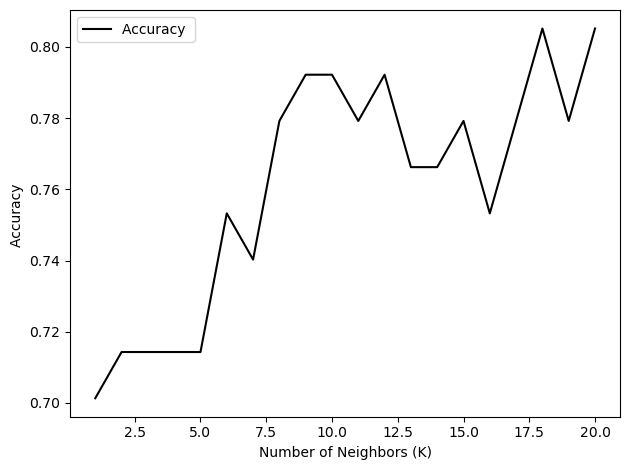

In [21]:
plt.plot(range(1,Kn),mean_acc,'k')
plt.legend(('Accuracy ', '1 std','3 std'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [22]:
print(f"The best accuracy was with : {mean_acc.max():0.3f} with k= {mean_acc.argmax()+1}")

The best accuracy was with : 0.805 with k= 18


In [24]:
model = KNeighborsClassifier(n_neighbors=18).fit(X=X_train, y=y_train)

In [25]:
print(f"Model Score: {model.score(X=X_test, y=y_test):0.3f}")

Model Score: 0.805


## Confiuse Matrix

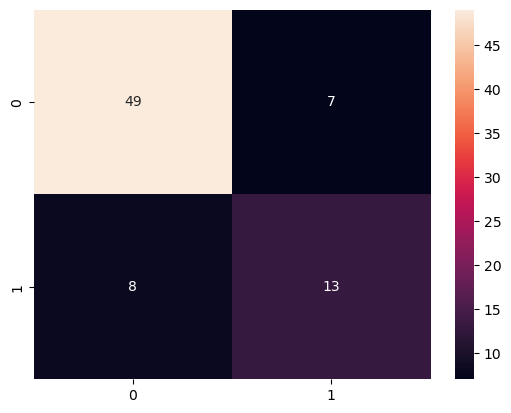

In [26]:
y_pred = model.predict(X=X_test)
conf = confusion_matrix(y_test,y_pred)
ax=sns.heatmap(pd.DataFrame(conf),annot=True ,fmt='g')

In [27]:
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP)  = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN)  = ', TN)
print('False Negative(FN) = ', FN)

True Positive(TP)  =  13
False Positive(FP) =  7
True Negative(TN)  =  49
False Negative(FN) =  8


---
$$
\text{Accuracy} =  \frac{TP+TN}{P+N}\ = \frac {TP + TN}{TP + FP + TN + FN}\ \\
$$
$$
\text{PPV(Positve Predictive Value , Percision)} =  \frac {TP}{TP+FP}\  
$$
$$ 
\text{TPR(True Positive Rate , recall , hit rate)} = \frac {TP}{P}\ = \frac{TP}{TP+FN}\
$$
$$
F_{1}=2.\frac {PPV.TPR}{PPV+TPR}\ = \frac {2TP}{2TP+FP+FN}\
$$
---

In [28]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the binary classifier = {:0.3f}'.format(accuracy))
precision = precision_score(y_test,y_pred)
print('percision of the binary classifier = {:0.3f}'.format(precision))
recall = recall_score(y_test, y_pred)
print('recall of the binary classifier = {:0.3f}'.format(recall))
f1 = f1_score(y_test, y_pred)
print('f1 of the binary classifier = {:0.3f}'.format(f1))

Accuracy of the binary classifier = 0.805
percision of the binary classifier = 0.650
recall of the binary classifier = 0.619
f1 of the binary classifier = 0.634
